In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train[..., tf.newaxis] / 255.0
X_test = X_test[..., tf.newaxis] / 255.0

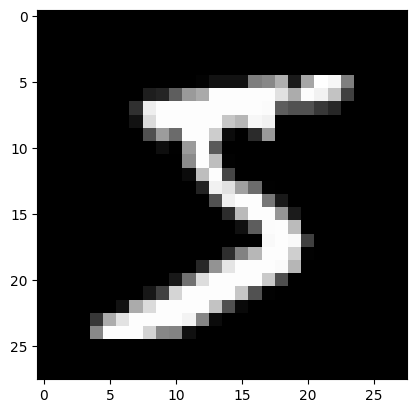

In [3]:
i = 0
plt.imshow(X_train[i], cmap='grey')

# 2. Build a Nural Network

In [4]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

D:\DataScience8\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model

<Sequential name=sequential, built=True>

# 3. Training

In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7159 - loss: 0.8422 - val_accuracy: 0.9610 - val_loss: 0.1539
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8924 - loss: 0.3389 - val_accuracy: 0.9730 - val_loss: 0.1026
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9149 - loss: 0.2708 - val_accuracy: 0.9752 - val_loss: 0.0918
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9293 - loss: 0.2297 - val_accuracy: 0.9770 - val_loss: 0.0766
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9352 - loss: 0.2079 - val_accuracy: 0.9800 - val_loss: 0.0680
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9392 - loss: 0.1940 - val_accuracy: 0.9813 - val_loss: 0.0641
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9426 - loss: 0.1820 - val_accuracy: 0.9820 - val_loss: 0.0608
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9463 - loss: 0.1723 - val_accuracy: 0.

# 4. Testing

In [9]:
loss, acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9825 - loss: 0.0577


In [10]:
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {acc*100:.2f}")

Test Loss: 0.06
Test Accuracy: 98.25


In [11]:
model.history

import pandas as pd
losses = pd.DataFrame(model.history.history)

In [12]:
losses[['accuracy', 'loss']].plot()

NameError: name 'losses' is not defined